### MODELO DETERMINÍSTICO -- Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time 

In [2]:
# Reemplazar por datos de irradiación del IDEAM --> 2020/08/01 to 2024/07/16
data = pd.read_excel("mod_deter_datos_python.xlsx")
data.head()

,Period,GHI,T
0,2020-08-01T00:00:00Z,1,15.57
1,2020-08-01T01:00:00Z,0,15.43
2,2020-08-01T02:00:00Z,0,15.55
3,2020-08-01T03:00:00Z,0,15.57
4,2020-08-01T04:00:00Z,0,15.40


In [3]:
data['Period'] = pd.to_datetime(data['Period'])
irradiance = data["GHI"]
temperatura = data["T"]
nr = 0.211
beta = 0.003
t_cNOCT = 44
t_aNOCT = 20
irradiance_NOCT = 800
T_r = 25
data["Efficiency"] = nr*(1-(0.9*beta*(irradiance/irradiance_NOCT)*(t_cNOCT-t_aNOCT))-beta*(temperatura-T_r))
data

,Period,GHI,T,Efficiency
0,2020-08-01 00:00:00+00:00,1,15.57,0.216952
1,2020-08-01 01:00:00+00:00,0,15.43,0.217058
2,2020-08-01 02:00:00+00:00,0,15.55,0.216982
3,2020-08-01 03:00:00+00:00,0,15.57,0.216969
4,2020-08-01 04:00:00+00:00,0,15.40,0.217077
...,...,...,...,...
34676,2024-07-15 20:00:00+00:00,574,17.71,0.205804
34677,2024-07-15 21:00:00+00:00,582,17.15,0.206022
34678,2024-07-15 22:00:00+00:00,381,16.65,0.209774
34679,2024-07-15 23:00:00+00:00,139,16.35,0.214100


In [4]:
## Área del techo para el caso determinístico
area = 200
area_util = area*0.75
N_paneles = round(area_util/13.13,0)
N_paneles = 4

In [5]:
### Generación de energía
### Tomando en cuenta: Eficiencia del inversor (96%) --> Pérdida por conversión: DC to AC 
data["Generacion"]  = N_paneles*(data["Efficiency"]-0.04)*2.2567285*data["GHI"]*1
data

,Period,GHI,T,Efficiency,Generacion
0,2020-08-01 00:00:00+00:00,1,15.57,0.216952,1.597331
1,2020-08-01 01:00:00+00:00,0,15.43,0.217058,0.000000
2,2020-08-01 02:00:00+00:00,0,15.55,0.216982,0.000000
3,2020-08-01 03:00:00+00:00,0,15.57,0.216969,0.000000
4,2020-08-01 04:00:00+00:00,0,15.40,0.217077,0.000000
...,...,...,...,...,...
34676,2024-07-15 20:00:00+00:00,574,17.71,0.205804,859.106651
34677,2024-07-15 21:00:00+00:00,582,17.15,0.206022,872.224258
34678,2024-07-15 22:00:00+00:00,381,16.65,0.209774,583.895532
34679,2024-07-15 23:00:00+00:00,139,16.35,0.214100,218.450166


In [6]:
data["Generacion"][13]

404.51509933549204

In [7]:
df = data
df['Year_Month'] = df['Period'].dt.to_period('M')

monthly_generation = df.groupby('Year_Month')['Generacion'].sum().reset_index()

df = df.merge(monthly_generation, on='Year_Month', suffixes=('', '_Monthly_Sum'))

df['Monthly_Generation_Sum'] = df['Generacion_Monthly_Sum'].where(df['Period'].dt.to_period('M').duplicated(keep='first') == False)

df.drop(columns=['Generacion_Monthly_Sum'], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4264\494500071.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Year_Month'] = df['Period'].dt.to_period('M')
C:\Users\Admin\AppData\Local\Temp\ipykernel_4264\494500071.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Monthly_Generation_Sum'] = df['Generacion_Monthly_Sum'].where(df['Period'].dt.to_period('M').duplicated(keep='first') == False)


In [8]:
monthly_df = df[['Year_Month', 'Monthly_Generation_Sum']].dropna().drop_duplicates()
monthly_df.reset_index(drop=True, inplace=True)
monthly_df["Generation_kWh"] = monthly_df["Monthly_Generation_Sum"]/1000
monthly_df

,Year_Month,Monthly_Generation_Sum,Generation_kWh
0,2020-08,276018.990285,276.018990
1,2020-09,260266.905602,260.266906
2,2020-10,236289.012437,236.289012
3,2020-11,204668.789762,204.668790
4,2020-12,234129.596453,234.129596
5,2021-01,260956.023582,260.956024
6,2021-02,202560.844344,202.560844
7,2021-03,215187.419703,215.187420
8,2021-04,225079.962384,225.079962
9,2021-05,235657.669163,235.657669


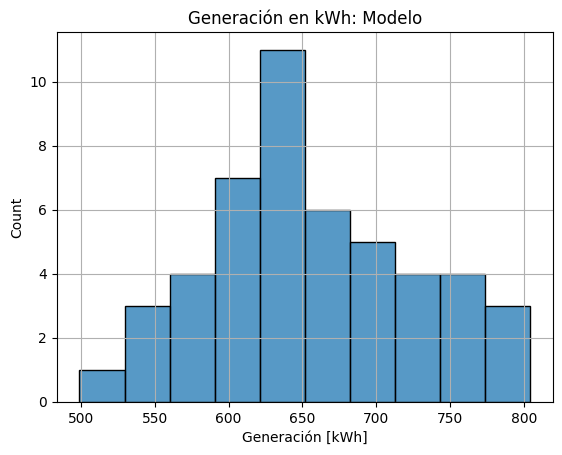

In [9]:
sns.histplot(monthly_df["Generation_kWh"],bins=10)
plt.title("Generación en kWh: Modelo")
plt.xlabel("Generación [kWh]")
plt.grid(True)